In [1]:
from src.clustering.run import run_clusters, load_config, get_cluster
from src.reachability_analysis.labeling_oracle import LabelingOracleSINDData
from src.clustering.Labels import run_labels, plot_dual_pca_3d, plot_dual_tsne_3d
import os

In [2]:
load_embeddings = False
# min_samples = 30

In [3]:
RERUN = False
min_samples=30
model_file = 'SINDDataset_pretrained_2024-04-27_00-11-45_KIP'
index=2
index_data=0
folder='experiments'

# RERUN = True
# model_file = 'SINDDataset_pretrained_2024-04-07_19-22-21_GNG'
# index = 6
# index_data = 5
# folder='experiments'

# RERUN = True
# model_file = 'SINDDataset_pretrained_2024-04-11_18-50-20_Jp7'
# index = 6
# index_data = 5
# folder='experiments'

# RERUN = True
# model_file = 'SINDDataset_pretrained_2024-04-29_14-31-01_xjx'
# index = 2
# index_data = 0
# folder='experiments'

# # NO
# RERUN = True
# model_file = 'SINDDataset_pretrained_2024-04-07_05-02-47_6pf'
# index = 6
# index_data = 5
# folder='experiments'

# RERUN = True
# min_samples = 15
# model_file = 'SINDDataset_pretrained_2024-04-05_04-16-14_6Dq'
# index = 6
# index_data = 5
# folder='experiments'

# RERUN = True
# load_embeddings = False
# min_samples = 20
# model_file = 'SINDDataset_pretrained_2024-04-29_15-06-12_OYL'
# index = 2
# index_data = 0
# folder='experiments'

# RERUN = True
# load_embeddings = True
# min_samples = 20
# model_file = 'SINDDataset_pretrained_2024-04-29_15-52-41_fpQ'
# index = 2
# index_data = 0
# folder='experiments'

# RERUN = True
# load_embeddings = False
# min_samples = 28
# model_file = 'SINDDataset_pretrained_2024-04-29_16-49-55_OpY'
# index = 2
# index_data = 0
# folder='experiments'

# RERUN = True
# load_embeddings = False
# min_samples = 30
# model_file = 'SINDDataset_pretrained_2024-04-30_01-01-38_fkK'
# index = 2
# index_data = 0
# folder='experiments'

### Create Clusters

In [4]:
load_embeddings, min_samples, RERUN

(False, 30, False)

In [5]:
config = load_config(folder=folder, model_file=model_file, index=index, index_data=index_data)
config["remove_noise"] = True
if RERUN: run_clusters(config=config, load_embeddings=load_embeddings, load_clusters=False, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)
clusters1, embeddings, target, padding_masks = run_clusters(config=config, load_embeddings=True, load_clusters=True, show_clusters=False,min_cluster_size = 5, min_samples = min_samples)

Silhouette Score: 0.5331334471702576, num_clusters: 60


In [6]:
config_original = config.copy()
config_original["original_data"] = True
if RERUN: run_clusters(config=config_original, load_embeddings=True, load_clusters=False, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)
clusters2, embeddings, target, padding_masks = run_clusters(config=config_original, load_embeddings=True, load_clusters=True, show_clusters=False, min_cluster_size= 5, min_samples = min_samples)

Silhouette Score: 0.48794238801005047, num_clusters: 43


In [7]:
config["data_chunk_len"], embeddings.shape

(50, (10412, 50, 128))

In [8]:
# plot_dual_tsne_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]))

In [9]:
clusters2[clusters2==-1].sum(), len(clusters2), clusters1[clusters1==-1].sum(), len(clusters1)

(-6353, 10412, -7290, 10412)

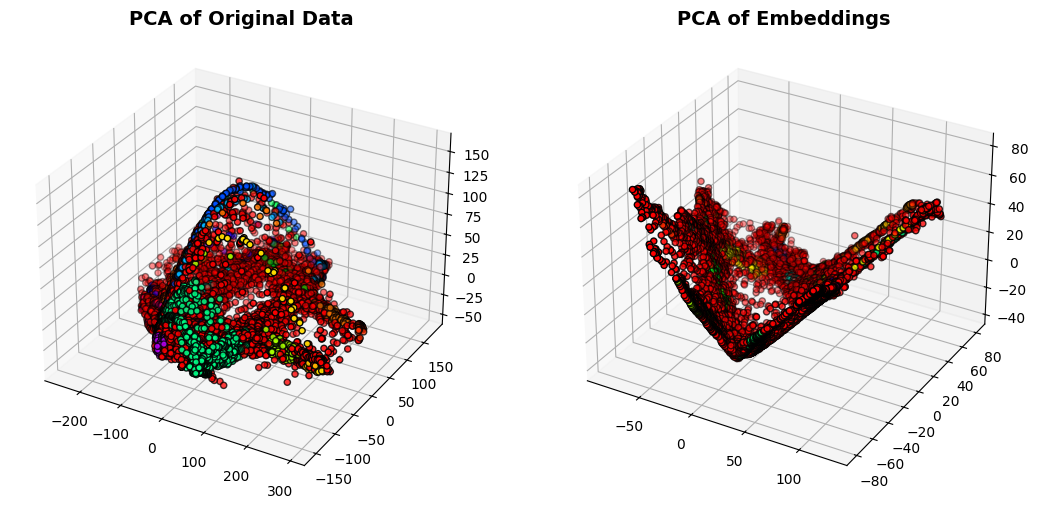

In [10]:
plot_dual_pca_3d((target, clusters2), (embeddings, clusters1))

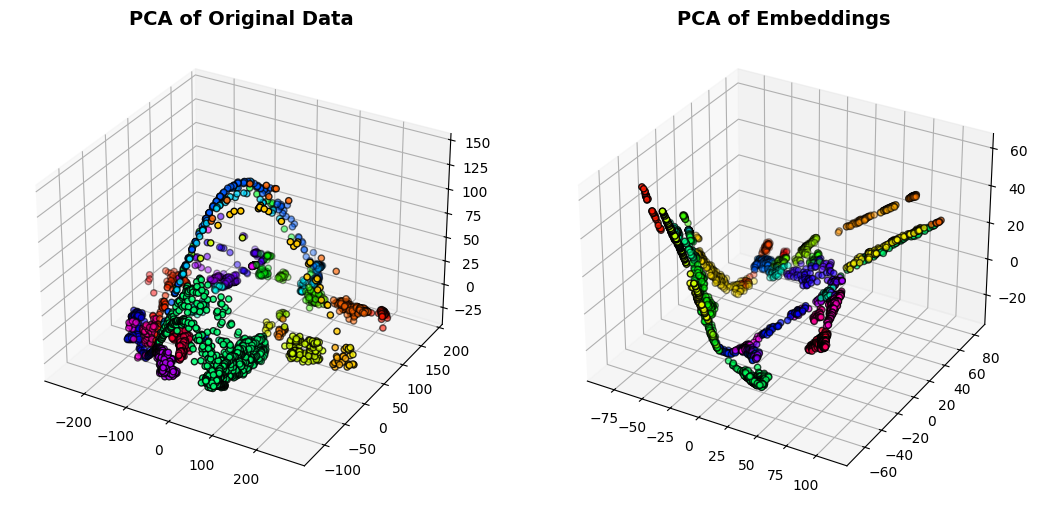

In [11]:
plot_dual_pca_3d((target[clusters2!=-1], clusters2[clusters2!=-1]), (embeddings[clusters1!=-1], clusters1[clusters1!=-1]), file=config["output_dir"]+"/clusters/pca_plot")

In [ ]:
config["original_data"], config_original["original_data"]

In [ ]:
run_labels(config, remove_noise=True)

Get Cluster ID

In [ ]:
ROOT_RESOURCES = os.getcwd() + "/resources"

In [ ]:
config_test = config.copy()
config_test['data_dir'] = ROOT_RESOURCES + f'/test/{"cross_left_8_6_4"}'
test_labeling_oracle = LabelingOracleSINDData(config_test)

In [ ]:
c = get_cluster(config_test, data_oracle=test_labeling_oracle)
c

### Plot Training Validation Loss

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.clustering.run import load_config

In [7]:
# sns.set_theme("notebook")

In [8]:
config = load_config()

In [9]:
config['output_dir']

'/home/kfragkedaki/projects/Pedestrian_Project/experiments/SINDDataset_pretrained_2024-04-27_00-11-45_KIP/eval10'

In [10]:
# Load the cost data
df_cost_train = pd.read_csv(f'{config["output_dir"]}/loss_train2.csv')
df_cost_val = pd.read_csv(f'{config["output_dir"]}/loss_val2.csv')
df_cost_train['DataType'] = 'Training'
df_cost_val['DataType'] = 'Validation'
# Concatenate the dataframes
df = pd.concat([df_cost_train, df_cost_val[1:]]).reset_index()
df['Epoch'] = df['Step']

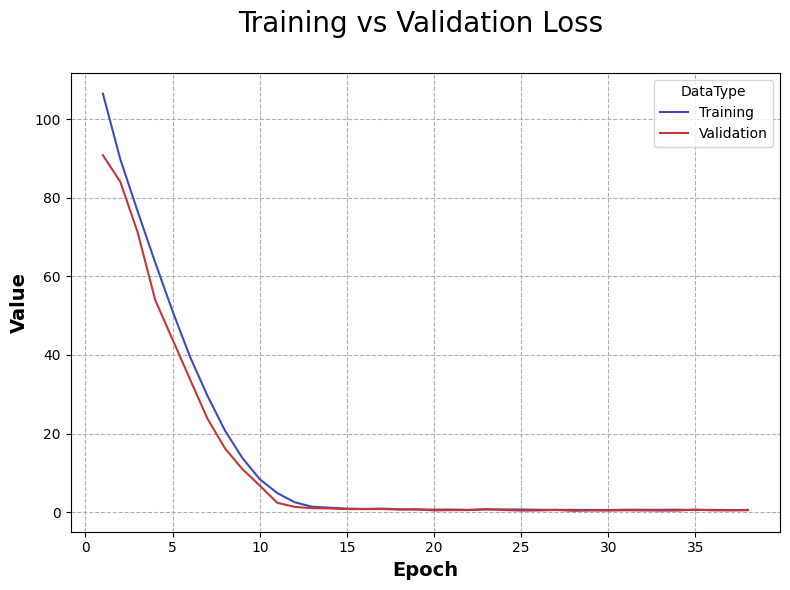

In [21]:
#  Create the plot
plt.figure(figsize=(8, 6))
colors = plt.cm.coolwarm(np.linspace(0, 1, 20))

# Plot using seaborn with Step on a log scale
ax = sns.lineplot(x='Epoch', y='Value', hue='DataType', palette=[colors[0], colors[18]], data=df)

ax.grid(which="major", ls="--",)
ax.grid(which="minor", ls="--", linewidth=0.33)

# Adjust the label size
plt.xlabel('Epoch', fontweight="bold", fontsize="16")
plt.ylabel('Value', fontweight="bold", fontsize="16")

# Adjust the ticklabel sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust the title size
plt.title('Training vs Validation Loss \n', size=20)

# Adjust the legend text size
plt.legend(fontsize='14')

plt.tight_layout()
# The file will be saved at the specified location, the path needs to be adjusted to your file system
plt.savefig(f"./plot_validation_training_cost.png", dpi=300, bbox_inches='tight')
plt.show()

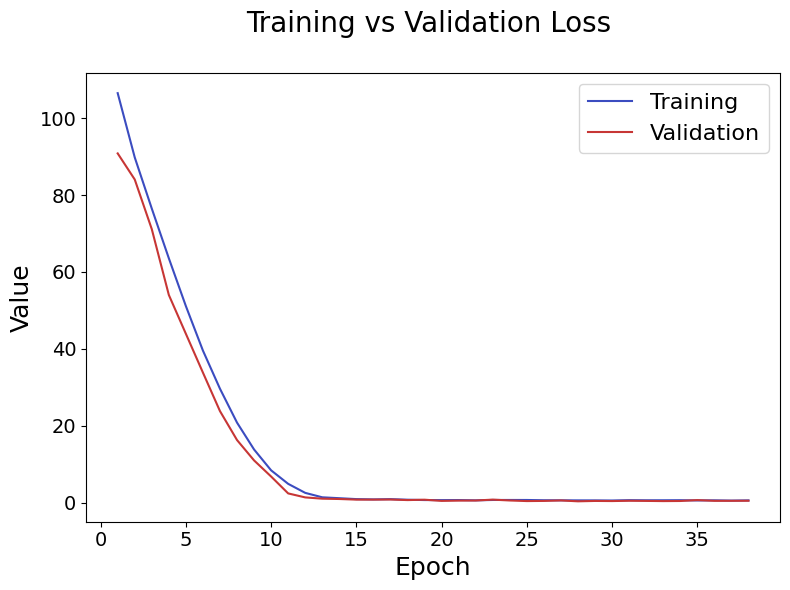

In [16]:
# Concatenate the dataframes
df = pd.concat([df_cost_train, df_cost_val[1:]]).reset_index()
df['Epoch'] = df['Step']
# # df = df[df['Epoch']  <= 50]
# df = df[df['Epoch']  <= 5]
# Create the plot
plt.figure(figsize=(8, 6))
colors = plt.cm.coolwarm(np.linspace(0, 1, 20))

# Plot using seaborn with Step on a log scale
ax = sns.lineplot(x='Step', y='Value', hue='DataType', palette=[colors[0], colors[18]], data=df)

# Adjusting the x-axis to log scale
# ax.set_yscale('log')
# 
# Adjust the label size
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Value', fontsize=18)

# Adjust the ticklabel sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust the title size
plt.title('Training vs Validation Loss \n', size=20)

# Adjust the legend text size
plt.legend(fontsize='16')

plt.tight_layout()
plt.savefig(f"./plot_validation_training_cost.png", dpi=300, bbox_inches='tight')
plt.show()